**PROBLEM STATEMENT** : Employee attrition or employees leaving an organization voluntarily or involuntarily represents a significant challenge for businesses. High attrition rates can lead to negative impact a company’s productivity and profitability. Based on the dataset, develop a predictive model that categorizes employees into "attrition" and "retention" groups based on historical employee data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [4]:
train=pd.read_csv('train project.csv')
test=pd.read_csv('test project.csv')
df=pd.concat([train,test],ignore_index=True)
pd.set_option('display.max_columns', None)  
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,Yes,40,Associate Degree,Single,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,Yes,45,Master’s Degree,Married,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,No,4,Associate Degree,Married,4,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,No,13,Bachelor’s Degree,Divorced,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

## Data Cleaning

In [9]:
df.duplicated().sum()

0

In [11]:
df.drop('Employee ID',axis=1,inplace=True)

In [13]:
df['Distance from Home']=(df['Distance from Home']*1.609).astype(int)

In [15]:
df['Years at Company']=(df['Years at Company']/12).round(1)

In [17]:
bins = [0, 4000, 7000, 10000, 13000, 17000]
labels = ['1k-4k', '4k-7k', '7k-10k', '10k-13k', '13k-17k']
df['Income Group'] = pd.cut(df['Monthly Income'], bins=bins, labels=labels, include_lowest=True)

In [19]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Income Group
0,31,Male,1.6,Education,5390,Excellent,Medium,Average,2,No,35,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed,4k-7k
1,59,Female,0.3,Media,5534,Poor,High,Low,3,No,33,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed,4k-7k
2,24,Female,0.8,Healthcare,8159,Good,High,Low,0,No,17,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed,7k-10k
3,36,Female,0.6,Education,3989,Good,High,High,1,No,43,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed,1k-4k
4,56,Male,3.4,Education,4821,Fair,Very High,Average,0,Yes,114,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed,4k-7k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,Female,3.5,Healthcare,7830,Poor,Medium,Average,0,Yes,64,Associate Degree,Single,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed,7k-10k
74494,30,Female,1.2,Education,3856,Good,Medium,Average,2,Yes,72,Master’s Degree,Married,0,Entry,Medium,20,No,No,No,Good,Medium,Left,1k-4k
74495,52,Male,0.4,Education,5654,Good,Very High,Below Average,0,No,6,Associate Degree,Married,4,Mid,Small,7,No,No,No,Good,High,Left,4k-7k
74496,18,Male,0.3,Education,5276,Fair,High,Average,0,No,20,Bachelor’s Degree,Divorced,3,Mid,Large,5,No,No,No,Poor,High,Stayed,4k-7k


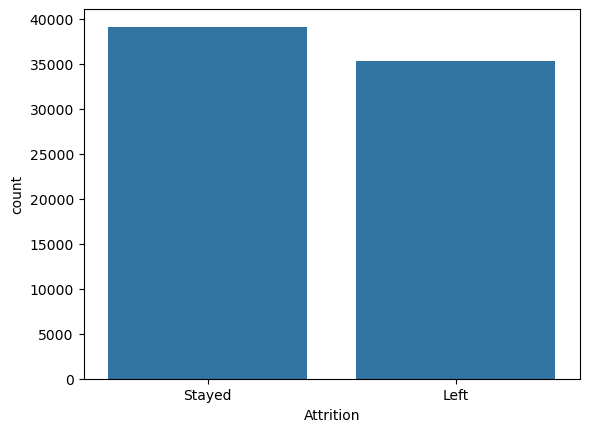

In [21]:
sns.countplot(data=df,x='Attrition')
plt.show()

## One Hot Encoding

In [24]:
df1=pd.get_dummies(df[['Gender','Remote Work','Overtime','Income Group']]).astype(int)
df=pd.concat([df,df1],axis=1)
df.drop(['Gender','Remote Work','Overtime','Income Group'],axis=1,inplace=True)

## Label Encoding

In [27]:
cat_cols = df.select_dtypes(include='object').columns
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

## Correlation Analysis

<Axes: >

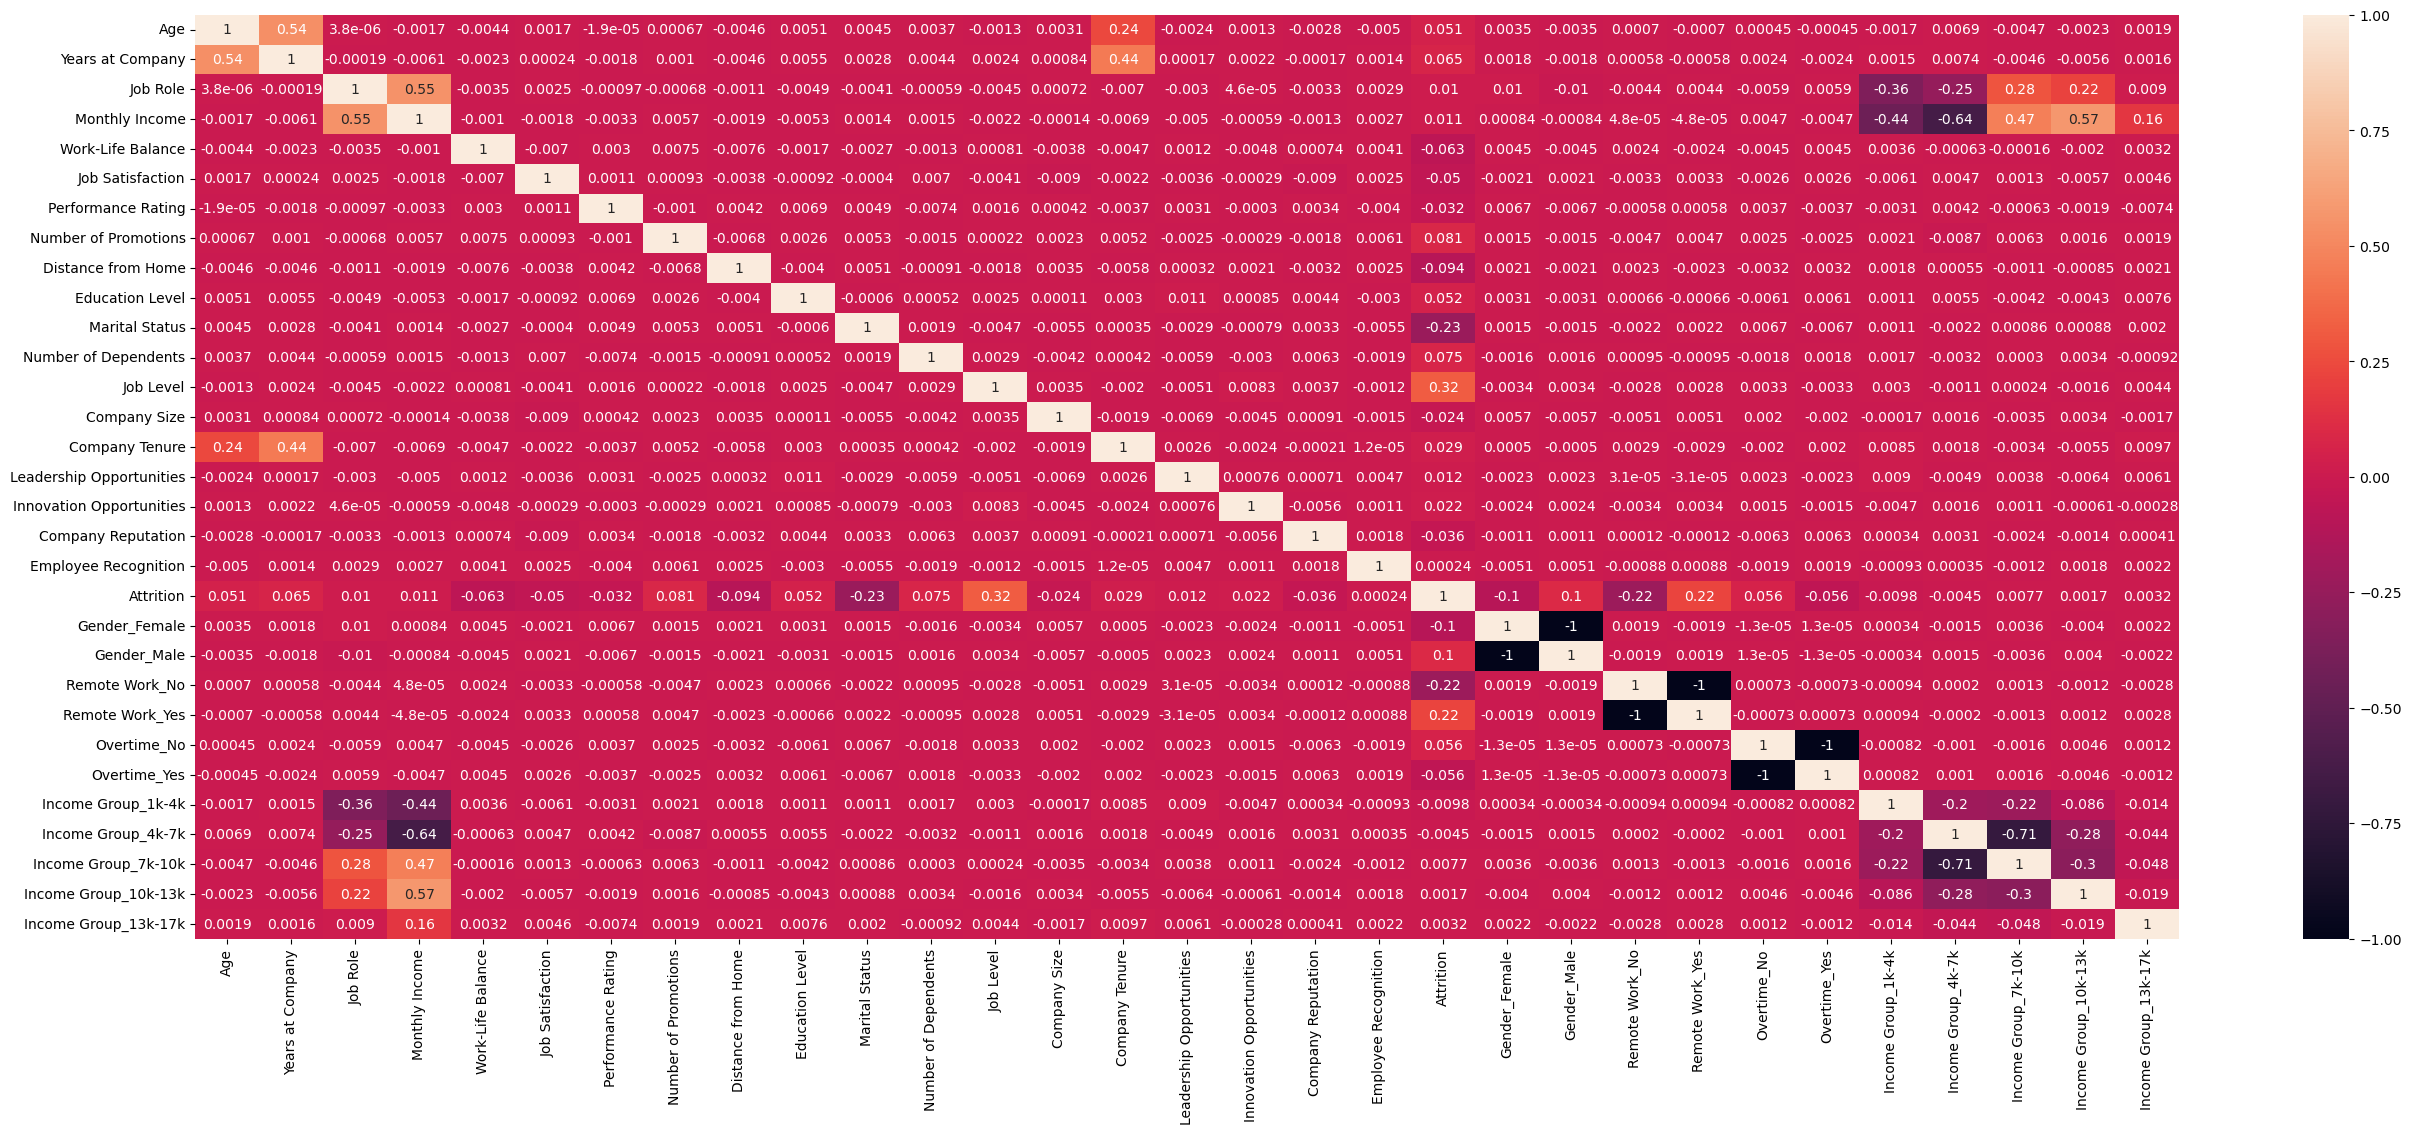

In [30]:
plt.figure(figsize=(32,12))
sns.heatmap(df.corr(),annot=True)

In [31]:
df.drop(['Employee Recognition','Company Size','Company Tenure','Leadership Opportunities','Innovation Opportunities','Company Reputation','Performance Rating','Monthly Income'],axis=1,inplace=True)

## x y Split

In [35]:
y=df['Attrition']
x=df.drop(['Attrition'],axis=1)

## Standard Scaling

In [38]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

## Outlier Handling

<Axes: >

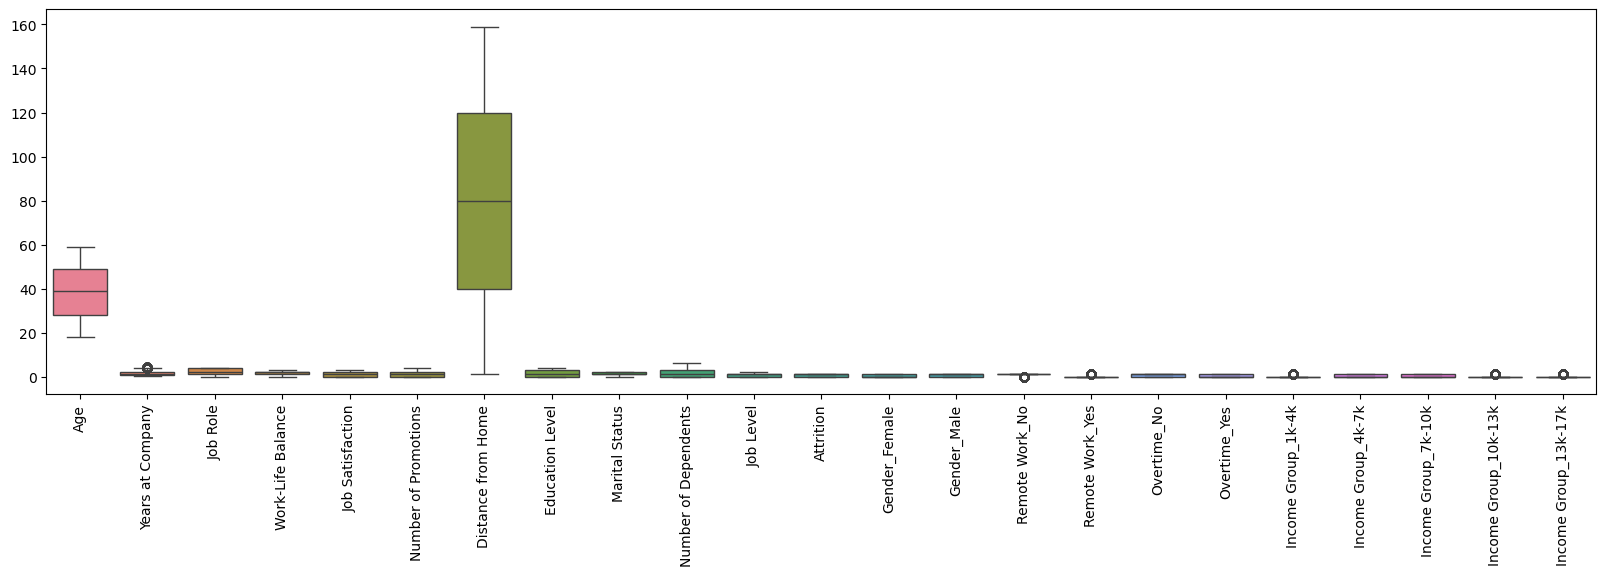

In [41]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(df)

In [42]:
for i in df:
    q1=np.percentile(df[i],25,method='midpoint')
    q3=np.percentile(df[i],75,method='midpoint')
    iqr=q3-q1
    low_lim=q1-1.5*iqr
    upp_lim=q3+1.5*iqr
    df[i]=df[i].clip(lower=low_lim,upper=upp_lim)

<Axes: >

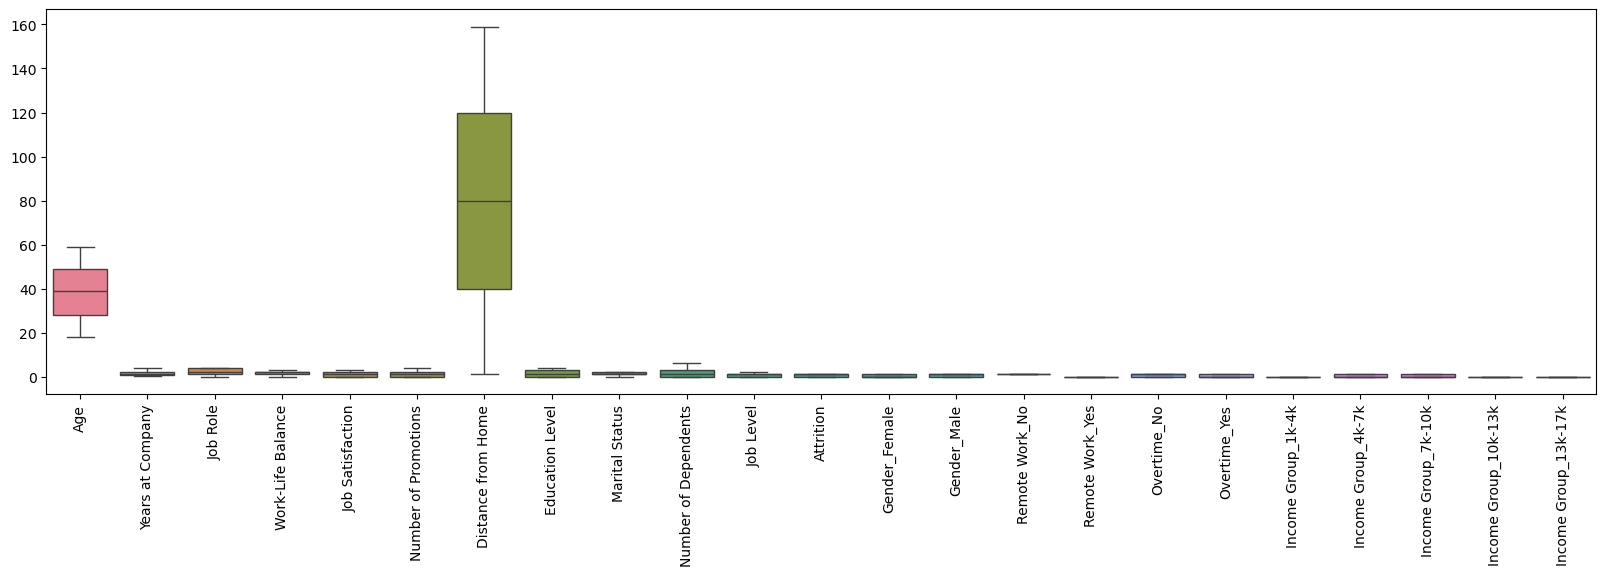

In [43]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(df)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,random_state=42,test_size=0.2)

## Random Forest

In [50]:
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9, 1],
    'max_features': ['sqrt', None]
}
rf_cv=RandomizedSearchCV(rf,param_grid)
rf_cv.fit(x_train,y_train)
rf_cv.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 9}

In [52]:
rf=RandomForestClassifier(n_estimators= 200, max_features= 'sqrt', max_depth= 9)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [54]:
metric=['Train accuracy','Test accuracy','Precision','Recall','F1 score','roc_auc ']
Table=pd.DataFrame([[rf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)],[roc_auc_score(y_test,rf_pred)]],columns=['Random forest'])
Table.index=metric
Table

,Random forest
Train accuracy,0.755747
Test accuracy,0.748188
Precision,0.758815
Recall,0.761148
F1 score,0.759980
roc_auc,0.747541


In [56]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      7096
           1       0.76      0.76      0.76      7804

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



## Decision Tree

In [59]:
dt=DecisionTreeClassifier()
param_grid={'max_depth':[10,20,30],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}
dt_cv=RandomizedSearchCV(dt,param_grid)
dt_cv.fit(x_train,y_train)
dt_cv.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}

In [61]:
dt=DecisionTreeClassifier(min_samples_split=10, min_samples_leaf= 4, max_depth= 10)
dt.fit(x_train,y_train)
dt_pred=rf.predict(x_test)

In [63]:
metric=['Train accuracy','Test accuracy','Precision','Recall','F1 score','roc_auc ']
Table=pd.DataFrame([[dt.score(x_train,y_train)],[accuracy_score(y_test,dt_pred)],[precision_score(y_test,dt_pred)],[recall_score(y_test,dt_pred)],[f1_score(y_test,dt_pred)],[roc_auc_score(y_test,dt_pred)]],columns=['Decision Tree'])
Table.index=metric
Table

,Decision Tree
Train accuracy,0.750998
Test accuracy,0.748188
Precision,0.758815
Recall,0.761148
F1 score,0.759980
roc_auc,0.747541


In [65]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      7096
           1       0.76      0.76      0.76      7804

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



## Xgboost

In [68]:
xg=XGBClassifier()
param_grid = {
    
    'max_depth': [7, 6, 5],
    'learning_rate': [0.15, 0.1, 0.05],
    'n_estimators': [400, 300, 200],
    'subsample': [0.9, 0.8, 0.7],
    'colsample_bytree': [0.9, 0.8, 0.7],
}

xg_cv=RandomizedSearchCV(xg,param_grid,n_iter=30,cv=5,scoring='accuracy')
xg_cv.fit(x_train,y_train)
xg_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.7}

In [70]:
xg=XGBClassifier(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.7,
    colsample_bytree=0.7,
    use_label_encoder=False,
    eval_metric='logloss'
 )
xg.fit(x_train, y_train)
xg_pred=xg.predict(x_test)

In [72]:
metric=['Train accuracy','Test accuracy','Precision','Recall','F1 score','roc_auc ']
Table=pd.DataFrame([[xg.score(x_train,y_train)],[accuracy_score(y_test,xg_pred)],[precision_score(y_test,xg_pred)],[recall_score(y_test,xg_pred)],[f1_score(y_test,xg_pred)],[roc_auc_score(y_test,xg_pred)]],columns=['XG Boost'])
Table.index=metric
Table

,XG Boost
Train accuracy,0.759455
Test accuracy,0.759530
Precision,0.771867
Recall,0.767811
F1 score,0.769834
roc_auc,0.759117


In [74]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7096
           1       0.77      0.77      0.77      7804

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



Text(50.722222222222214, 0.5, 'actual')

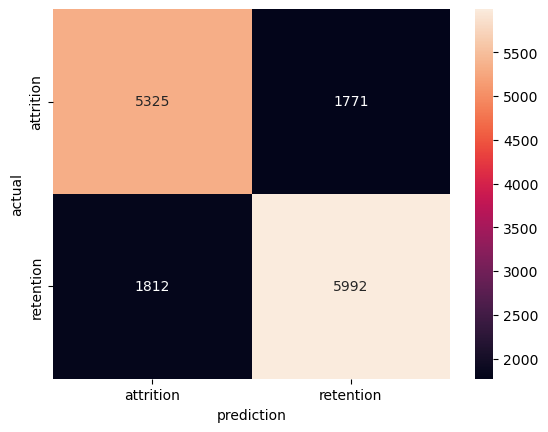

In [76]:
sns.heatmap(confusion_matrix(y_test,xg_pred),annot=True,fmt='g',
           xticklabels=['attrition','retention'],
           yticklabels=['attrition','retention'])
plt.xlabel('prediction')
plt.ylabel('actual')

In [78]:
with open('model.pkl','wb')as model_file:
    pickle.dump(xg,model_file)

In [80]:
df

,Age,Years at Company,Job Role,Work-Life Balance,Job Satisfaction,Number of Promotions,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Attrition,Gender_Female,Gender_Male,Remote Work_No,Remote Work_Yes,Overtime_No,Overtime_Yes,Income Group_1k-4k,Income Group_4k-7k,Income Group_7k-10k,Income Group_10k-13k,Income Group_13k-17k
0,31,1.60,0,0,2,2,35,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0
1,59,0.30,3,3,0,3,33,3,0,3,1,1,1,0,1,0,1,0,0,1,0,0,0
2,24,0.80,2,2,0,0,17,1,1,3,1,1,1,0,1,0,1,0,0,0,1,0,0
3,36,0.60,0,2,0,1,43,2,2,2,1,1,1,0,1,0,1,0,0,0,0,0,0
4,56,3.40,0,1,3,0,114,2,0,0,2,1,0,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,3.50,2,3,2,0,64,0,2,0,2,1,1,0,1,0,0,1,0,0,1,0,0
74494,30,1.20,0,2,2,2,72,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
74495,52,0.40,0,2,3,0,6,0,1,4,1,0,0,1,1,0,1,0,0,1,0,0,0
74496,18,0.30,0,1,0,0,20,1,0,3,1,1,0,1,1,0,1,0,0,1,0,0,0
